## Biocomuputing Final Project: Stability of Predator Prey Dynamics
### Authors: Brittni Bertolet, Josh Hobgood, Aaron Long, and Om Neelay

For our final project, we describe the dynamics of two classic predator-prey models from ecological literature. First, we describe the overall behavior of the model. Second, we provide various simulations to describe the effects of each parameter on population dynamics. 

### Lotka-Volterra

The Lotka-Volterra Model describes a simple predator-prey relationship, in wh

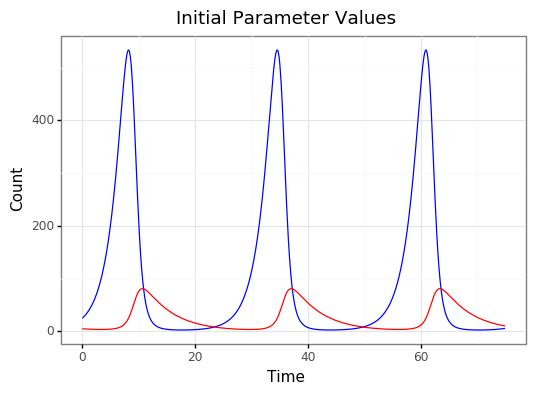

<ggplot: (291492797)>


In [20]:
#Import packages
import os
import numpy as np
import pandas as pd
import scipy
import scipy.integrate as spint
from plotnine import *

######################################################################
#Part 1 - Lotka Volterra Model
#Define a custom function for Lotka Volterra model
def LVSim(y,t0,b,a,e,s):
    #unpack state variables from list y
    H=y[0]
    P=y[1]
    #calculate changes in state variables
    dHdt=(b*H)-(a*P*H)
    dPdt=(e*a*P*H)-(s*P)
    #return lists containing changes in state variables with time
    return [dHdt,dPdt]

#Simulate model dynamics with one set of parameter values
##define initial values for state variables
H0=25; P0=5; N0=[H0,P0]
##define parameters
b=0.5; a=0.02; e=0.1; s=0.2
##put parameters in tuple
params=(b,a,e,s)
#define time steps
times=np.arange(0,75,0.1)
##simulate
modelSim=spint.odeint(func=LVSim,y0=N0,t=times,args=params)
##put output in a dataframe with time
modelSim=pd.DataFrame(data=modelSim)
modelSim['t']=times
modelSim.columns=["H", "P", "t"]

#Plot dynamics
LV_plot=ggplot(modelSim, aes(x="t"))+geom_line(aes(y="H"), color="blue")+geom_line(aes(y="P"), color="red")+theme_bw()+xlab("Time")+ylab("Count")+ggtitle("Initial Parameter Values")
print(LV_plot)

### Rosenzweig-MacArthur Model

The Rosenzweig-MacArthur Model expands upon the Lotka-Volterra Model by adding two additional parameters to account for the effect of self-limitation of the predator population and the effect of a saturating functional response between predators and prey density. Each population (H = prey, P = predator) is described with a single differential equation, where b = prey birth rate, α = intraspecific competition coefficient, w = predator attack rate, d = satuation effect, e = conversion efficiency of prey to predators, s = predator death rate:

$dH/dt = bH(1-αH)-wPH/(d+H)$

$dP/dt = ewPH/(d+H) - sP$

First, we simulated the dynamics of this model with the following parameters and initial conditions: 

b = 0.8, e = 0.07, s = 0.2, w = 5,d = 400, α = 0.001, H0 = 500, P0 = 120



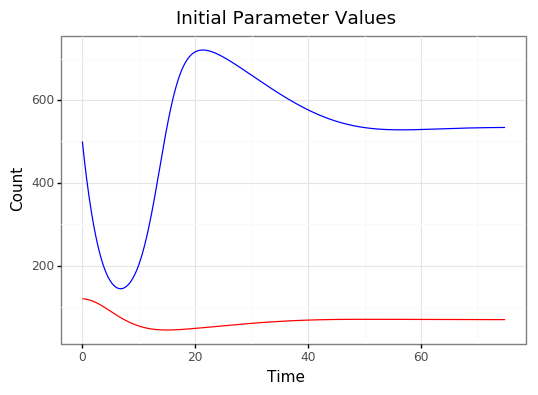

<ggplot: (291379093)>


In [21]:
#Part 2 - Rosenzweig-MacArthur Model
#Define a custom function for Rosenzweig-MacArthur model
def RMSim(y,t0,b,a,e,s,d,w):
    #unpack state variables from list y
    H=y[0]
    P=y[1]
    #calculate changes in state variables
    dHdt=(b*H)*(1-a*H)-(w*P)*(H/(d+H))
    dPdt=(e*w*P)*(H/(d+H))-s*P
    #return lists containing changes in state variables with time
    return [dHdt,dPdt]

#Simulate model dynamics with one set of parameter values
##define initial values for state variables
H0=500; P0=120; N0=[H0,P0]
##define parameters
b=0.8; a=0.001; e=0.07; s=0.2; d=400; w=5
##put parameters in tuple
params=(b,a,e,s,d,w)
##define time steps
times=np.arange(0,75,0.1)
##simulate
modelSim=spint.odeint(func=RMSim,y0=N0,t=times,args=params)
##put output in a dataframe with time
modelSim=pd.DataFrame(data=modelSim)
modelSim['t']=times
modelSim.columns=["H", "P", "t"]

#Plot dynamics
RM_plot=ggplot(modelSim, aes(x="t"))+geom_line(aes(y="H"), color="blue")+geom_line(aes(y="P"), color="red")+theme_bw()+xlab("Time")+ylab("Count")+ggtitle("Initial Parameter Values")
print(RM_plot)

The prey equation itself is split into two parts. The left portion describes the population of the prey as if they were isolated. Parameter b represents the rate of increase of the population, which can be quantified as the difference between births and deaths within the population. The expression in the parentheses is representative of the effect of the carrying capacity on the prey population growth. Here, α represents 1/k where k is the carrying capacity. The second term, the term on the right, describes the effect of predation on the population. w is the probability of that, when predator and prey meet, the prey will be killed. d is reflective of the previously mentioned saturation effect, and is the speed at which this saturation is reached.

To understand the effect of these parameters further, we did a series of simulations in which we changed one paramter at a time and plotted the results. Prey (blue) and predator (red) dynamics were plotted against time, with the initial parameter value plotted as a solid line, a higher parameter value as a dashed line, and a lower parameter value as a dotted line.

In [22]:
#Simulate model dynamics, changing one parameter at a time 
##define multiple to reduce/increase parameters
m=1.5
##make list of each parameter and whether or not it changes
b=[b,b/m,b*m,b,b,b,b,b,b,b,b,b,b]
a=[a,a,a,a/m,a*m,a,a,a,a,a,a,a,a]
e=[e,e,e,e,e,e/m,e*m,e,e,e,e,e,e]
s=[s,s,s,s,s,s,s,s/m,s*m,s,s,s,s]
d=[d,d,d,d,d,d,d,d,d,d/m,d*m,d,d]
w=[w,w,w,w,w,w,w,w,w,w,w,w/m,w*m]
##put lists into a data frame
parameters=pd.DataFrame({'b':b, 'a':a, 'e':e, 's':s, 'd':d, 'w':w})
##rearrange order of columns
parameters=parameters[['b','a','e','s','d','w']]
##make into a list
parameters=parameters.values.tolist()
##create seperate data frames for output of H and P for each iteration
modelH_Output=pd.DataFrame(columns=["t", "H", "bHlow", "bHhigh", "aHlow", "aHhigh", "eHlow", "eHhigh", "sHlow", "sHhigh", "dHlow", "dHhigh", "wHlow", "wHhigh"])
modelP_Output=pd.DataFrame(columns=["t", "P", "bPlow", "bPhigh", "aPlow", "aPhigh", "ePlow", "ePhigh", "sPlow", "sPhigh", "dPlow", "dPhigh", "wPlow", "wPhigh"])
##fill time values in first column
modelH_Output.t=times
modelP_Output.t=times
##simulate model dynamics using a for loop
for i in range(0,len(parameters)):
    #set paramters for the iteration
    params=parameters[i]
    #run siumulation with odeint
    modelSim=spint.odeint(func=RMSim,y0=N0,t=times,args=tuple(params))
    #convert output from array to data frame
    modelSim=pd.DataFrame(data=modelSim)
    #add results to model output data frame
    modelH_Output.iloc[:, i+1]=modelSim[0]
    modelP_Output.iloc[:, i+1]=modelSim[1]

#Graph results manually from model output 
###plot of prey counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
RMplot_Hb=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="bHlow"), color='blue', linetype='dotted')+geom_line(aes(y="bHhigh"), color='blue', linetype='dashed')+ggtitle("Different b values")+ylab("Prey counts")+xlab("Time")+theme_bw()
###plot of predator counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
RMplot_Pb=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="bPlow"), color='red', linetype='dotted')+geom_line(aes(y="bPhigh"), color='red', linetype='dashed')+ggtitle("Different b values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter a is changing
RMplot_Ha=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="aHlow"), color='blue', linetype='dotted')+geom_line(aes(y="aHhigh"), color='blue', linetype='dashed')+ggtitle("Different a values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pa=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="aPlow"), color='red', linetype='dotted')+geom_line(aes(y="aPhigh"), color='red', linetype='dashed')+ggtitle("Different a values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter e is changing
RMplot_He=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="eHlow"), color='blue', linetype='dotted')+geom_line(aes(y="eHhigh"), color='blue', linetype='dashed')+ggtitle("Different e values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pe=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="ePlow"), color='red', linetype='dotted')+geom_line(aes(y="ePhigh"), color='red', linetype='dashed')+ggtitle("Different e values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter s is changing
RMplot_Hs=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="sHlow"), color='blue', linetype='dotted')+geom_line(aes(y="sHhigh"), color='blue', linetype='dashed')+ggtitle("Different s values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Ps=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="sPlow"), color='red', linetype='dotted')+geom_line(aes(y="sPhigh"), color='red', linetype='dashed')+ggtitle("Different s values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter d is changing
RMplot_Hd=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="dHlow"), color='blue', linetype='dotted')+geom_line(aes(y="dHhigh"), color='blue', linetype='dashed')+ggtitle("Different d values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pd=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="dPlow"), color='red', linetype='dotted')+geom_line(aes(y="dPhigh"), color='red', linetype='dashed')+ggtitle("Different d values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter w is changing
RMplot_Hw=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="wHlow"), color='blue', linetype='dotted')+geom_line(aes(y="wHhigh"), color='blue', linetype='dashed')+ggtitle("Different w values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pw=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="wPlow"), color='red', linetype='dotted')+geom_line(aes(y="wPhigh"), color='red', linetype='dashed')+ggtitle("Different w values")+ylab("Predator counts")+xlab("Time")+theme_bw()

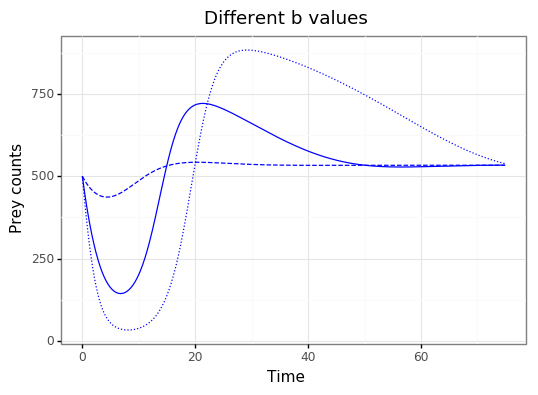

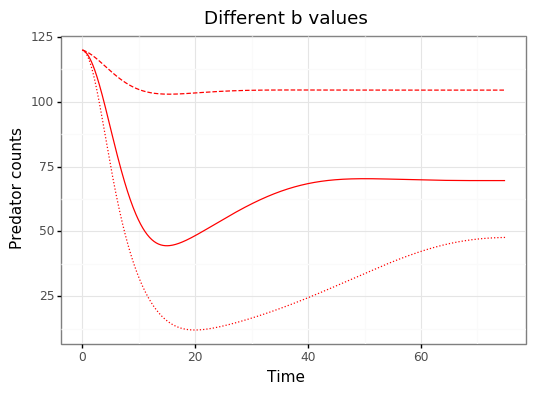

(<ggplot: (291735349)>, <ggplot: (291735537)>)


In [23]:
print(RMplot_Hb, RMplot_Pb)

***Effect of parameter b:*** Increasing b resulted in more population growth. 

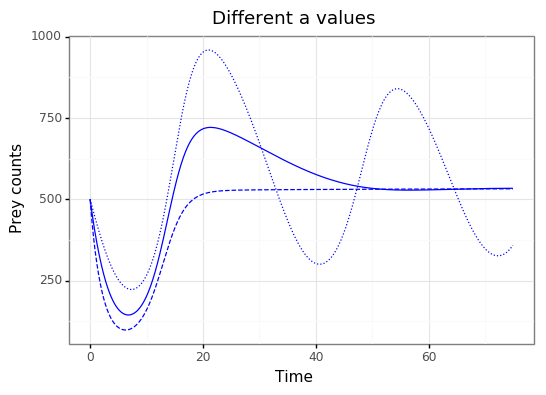

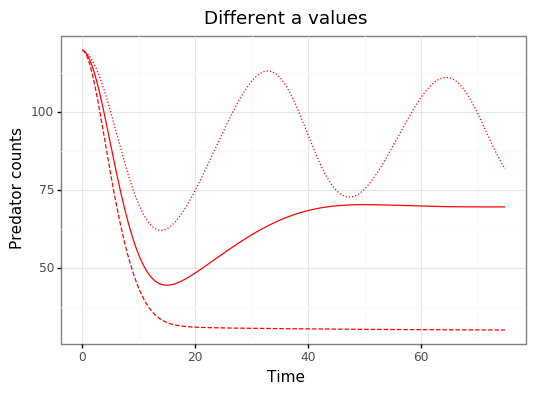

(<ggplot: (291159693)>, <ggplot: (291402225)>)


In [24]:
print(RMplot_Ha, RMplot_Pa)

***Effect of parameter a:** Increasing a caused the population to reach the carrying capacity faster, and thus increased the negative effects of the parenthetical term on population growth.

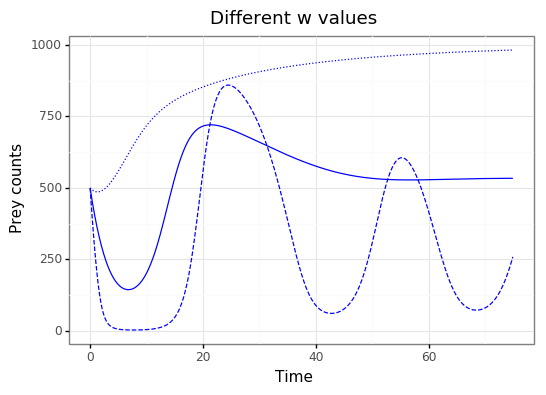

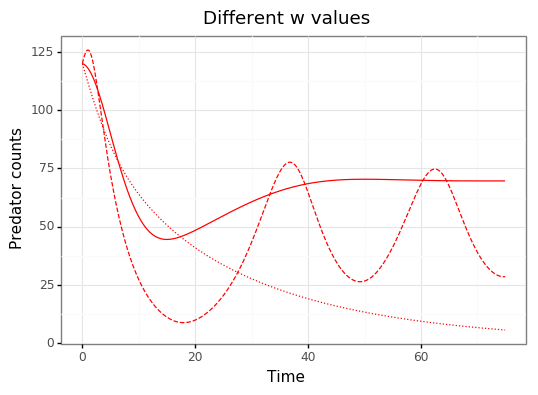

(<ggplot: (291374937)>, <ggplot: (291499849)>)


In [25]:
print(RMplot_Hw, RMplot_Pw)

***Effect of parameter w:*** Increasing w increased the number of predator-prey encounters that result in prey death and therefore decreased prey growth.

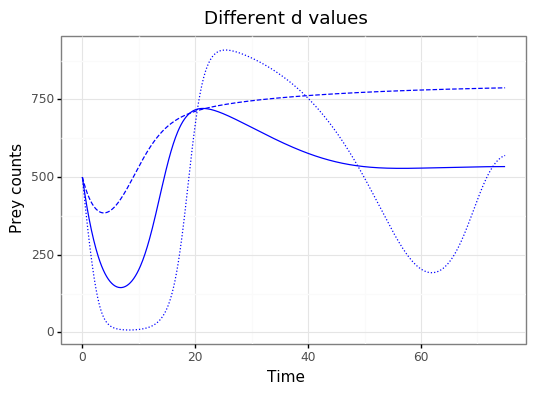

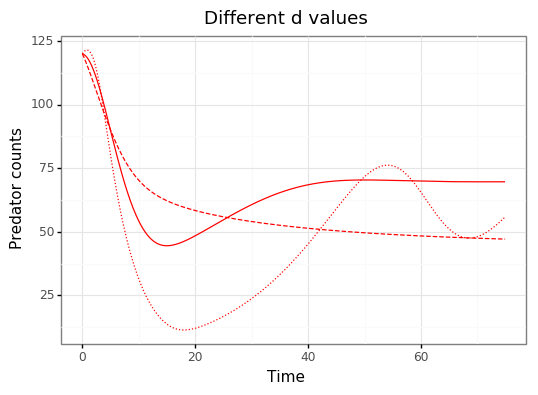

(<ggplot: (291718897)>, <ggplot: (291505169)>)


In [26]:
print(RMplot_Hd, RMplot_Pd)

***Effect of parameter d:*** Increasing d caused the predators to reach saturation quicker and also increased prey population growth.



The predator equation is also split into two halves. The first half describes the rate of predator population growth in relation to the resources present. e is the base rate at which predator populations increase per resource. w was described previously and functions the same way in this equation. d likewise describes the same effect as it did in the prey equation. The last parameter, s, describes the rate at which predators die when resources and prey are absent.

To put it in more basic terms, increases in e will increase predator population growth. Increases in w will have the same positive effect due to more encounters resulting in successful predation. d, if increased, will cause predators to become saturated by prey quicker, causing a decrease in growth. The last parameter is fairly self-explanatory: if s increases the rate of growth will decrease as predators will die quicker when prey is absent. As it was with the prey equation, a decrease in any of these parameters will result in the opposite effect being observed. 

While the LV model can essentially be described as a “birth minus death” model, the RM model describes population growth with more complexity. When prey populations are high, the predator populations reach a point and then plateau due to the effect of saturation; this is not accounted for in the LV model. The RM model also describes a carrying capacity for the prey which the LV model does not. At high populations, prey becomes self-limiting due to a lack of resource availability among many other factors. Finally, not every predator-prey encounter actually results in successful predation. This uncertainty is represented in w and is likewise not accounted for in the LV model.

All of the statements concerning the parameters can be represented graphically. A graph was constructed for each parameter to show how increases and decreases of the parameter impact the growth of predator and prey populations. Solid lines represent a basis for comparison, dotted lines show the dynamics if the parameter was decreased below the base value, and dashed lines show the dynamics if the parameter was increased above the base value.



### Paradox of Enrichment

The Paradox of Enrichment is a phenomenon observed in the Rosenzweig-MacArthur Model where there is an inverse relationship between the carrying capacity of the prey (α) and the population stability of the predator. In theory, increasing the availability of the prey should decrease the predator density and increase the overall stability of the predator population. Below is a graph of the predator population over time with varying prey carrying capacities (α=0.00125 to α=0.0005), where the darkness of the line represents a higher carrying capacity (lower α).

[INSERT PREDATOR PoE GRAPH HERE]

The Paradox of Enrichment is observed because higher resource availability results in dramatic changes in prey populations. At high prey carrying capacity, predator density increases rapidly as prey availability drops. At a certain point, prey availability is severely limited when compared to predator population, and this results in a lack of resources for the predator. This causes predator population to plummet. The low predator density now allows for the prey population to increase rapidly and the cycle repeats itself. Therefore, at higher prey carrying capacities, predator populations are destabilized. 
